Install Required Libraries

In [ ]:
#pip install numpy
#pip install pandas opencv-python keras tensorflow
#pip install pandas opencv-python keras tensorflow

1 - Import Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.models import load_model
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import cv2

2- Import Dataset

In [3]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()          # Loads MNIST dataset into training and test sets

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [4]:
x_train.shape  #60k training images which all have a 28x28 pixel

(60000, 28, 28)

In [5]:
print(x_test.shape, y_test.shape)                                                # Prints test data shapes: (10000, 28, 28) for images and (10000,) for labels

(10000, 28, 28) (10000,)


label= 3


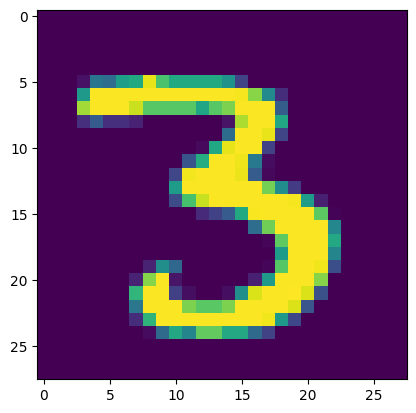

In [6]:
print("label=",y_train[12])                                                      # Prints the label (digit) of the 13th training image
plt.imshow(x_train[12])                                                          # Displays the 13th training image as a grayscale image

3- Preprocessing the Data

In [7]:
print(x_train.max(), x_train.min(), x_test.max(), x_test.min())                  # Prints max and min pixel values in training and test datasets

255 0 255 0


In [8]:
y_train[:6]                                                                      # Displays the first 6 digits from the training dataset

array([5, 0, 4, 1, 9, 2], dtype=uint8)

In [9]:
x_train_processed, x_test_processed = x_train / 255.0, x_test / 255.0            # Normalizes pixel values to range [0, 1] for training and test data      #Raw MNIST data is stored as an integer between 0-255, we transform it to 0 and 1

In [10]:

print(x_train_processed.max(), x_train_processed.min(), x_test_processed.max(),
      x_test_processed.min())                                                    # Prints the max and min pixel values after normalization (expectance is 1 and 0)

1.0 0.0 1.0 0.0


4- Build a clasifer using MLP

In [11]:
from keras.models import Sequential                                              # Import Sequential model
from keras.layers import Convolution2D, MaxPooling2D                             # Import convolution and max pooling layers for feature extraction
from keras.layers import Flatten, Dense, Dropout                                 # Import layers for flattening, fully connected  layers, and dropout
from keras.optimizers import Adam                                                # Import Adam optimizer for training the neural network


In [12]:
model = keras.models.Sequential([                                                # Create a Sequential model (layers stacked in order)
    keras.layers.Flatten(input_shape=(28, 28)),                                  # Flatten 28x28 images into a 1D vector of 784 values
    keras.layers.Dense(128, activation='relu'),                                  # Fully connected hidden layer with 128 neurons, ReLU activation
    keras.layers.Dropout(0.2),                                                   # Dropout layer set to 20% to reduce overfitting
    keras.layers.Dense(10, activation='softmax')                                 # Output layer with 10 neurons, softmax gives class probabilities
])


c:\Users\Mahir Kardame\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [13]:
784*128+128                                                                      # Number of trainable parameters in the first Dense layer (weights + biases) = 100,480

100480

In [14]:
model.summary()                                                                  #Displays model architecture

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#model.compile(optimizer='adam',                                                  # Use Adam optimizer for efficient training
              #loss='sparse_categorical_crossentropy',                            # Loss function for multi-class classification with integer labels
              #metrics=['accuracy'])                                              # Track accuracy as the evaluation metric


5 - Training & Testing the Model

  Optimizer  Learning Rate  Epochs  Accuracy (%)  Time Taken (s)
0      Adam          0.001       3         98.90           21.62
1      Adam          0.010       3         98.67           21.95
2      Adam          0.100       3          9.74           23.82
3       SGD          0.001       3         94.23           23.08
4       SGD          0.010       3         98.10           23.73
5       SGD          0.100       3         98.94           24.65


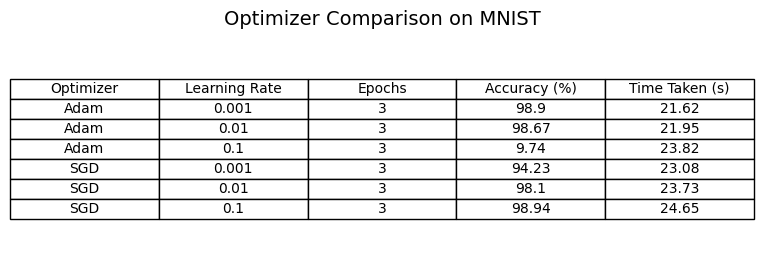

In [32]:
import tensorflow as tf
import matplotlib.pyplot as plt
import time
from tensorflow.keras.callbacks import Callback
from tensorflow.keras.optimizers import Adam, SGD
import pandas as pd

# --- Callback for timing ---
class TimingCallback(Callback):
    def on_train_begin(self, logs=None):
        self.times = []
    def on_epoch_begin(self, epoch, logs=None):
        self.epoch_start = time.time()
    def on_epoch_end(self, epoch, logs=None):
        self.times.append(time.time() - self.epoch_start)

# --- Build CNN model ---
def build_model():
    from tensorflow.keras.models import Sequential
    from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
    model = Sequential([
        Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
        MaxPooling2D((2,2)),
        Conv2D(64, (3,3), activation='relu'),
        MaxPooling2D((2,2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(10, activation='softmax')
    ])
    return model

# --- Prepare data (MNIST) ---
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train_processed = x_train.reshape(-1, 28, 28, 1).astype("float32") / 255.0
x_test_processed = x_test.reshape(-1, 28, 28, 1).astype("float32") / 255.0

# --- Experiment settings ---
optimizers = {
    "Adam": Adam,
    "SGD": SGD
}
learning_rates = [0.001, 0.01, 0.1]
epochs = 3
batch_size = 128

results = []

# --- Loop over optimizers & learning rates ---
for opt_name, opt_class in optimizers.items():
    for lr in learning_rates:
        model = build_model()
        if opt_name == "Adam":
            optimizer = opt_class(learning_rate=lr)
        else:
            optimizer = opt_class(learning_rate=lr, momentum=0.9)

        model.compile(optimizer=optimizer,
                      loss="sparse_categorical_crossentropy",
                      metrics=["accuracy"])

        timing = TimingCallback()
        history = model.fit(x_train_processed, y_train,
                            epochs=epochs, batch_size=batch_size,
                            validation_data=(x_test_processed, y_test),
                            verbose=0, callbacks=[timing])

        total_time = sum(timing.times)
        final_val_acc = history.history["val_accuracy"][-1] * 100

        results.append({
            "Optimizer": opt_name,
            "Learning Rate": lr,
            "Epochs": epochs,
            "Accuracy (%)": round(final_val_acc, 2),
            "Time Taken (s)": round(total_time, 2)
        })

# --- Convert results to DataFrame ---
df_results = pd.DataFrame(results)
print(df_results)

# --- Display table nicely (optional if running in Jupyter) ---
import matplotlib.pyplot as plt
import pandas as pd

fig, ax = plt.subplots(figsize=(8,3))
ax.axis('off')
table = ax.table(cellText=df_results.values,
                 colLabels=df_results.columns,
                 cellLoc='center', loc='center')
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.2)
plt.title("Optimizer Comparison on MNIST", fontsize=14)
plt.show()


In [17]:
test_loss, test_acc = model.evaluate(x_test_processed, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9783 - loss: 0.0728


In [18]:
print("Test Loss: ", test_loss)
print("Test Accuracy: ", test_acc)

Test Loss:  0.07284500449895859
Test Accuracy:  0.9782999753952026


In [19]:

training_loss = history.history['loss']
training_accuracy = history.history['accuracy']

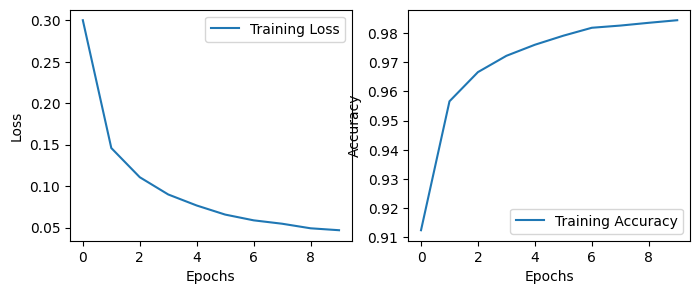

In [20]:
# Create subplots for loss and accuracy
plt.figure(figsize=(8, 3))
# Loss subplot
plt.subplot(1, 2, 1)
plt.plot(training_loss, label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Accuracy subplot
plt.subplot(1, 2, 2)
plt.plot(training_accuracy, label='Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [21]:

model.predict(x_test_processed)[2].argmax()

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 713us/step


np.int64(1)

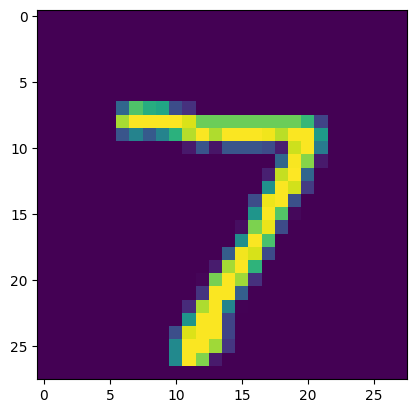

In [22]:
plt.imshow(x_test[0])

In [23]:
y_test[0]

np.uint8(7)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


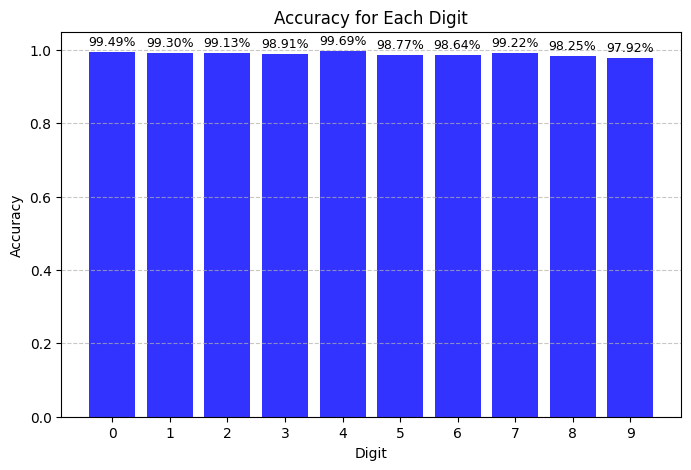

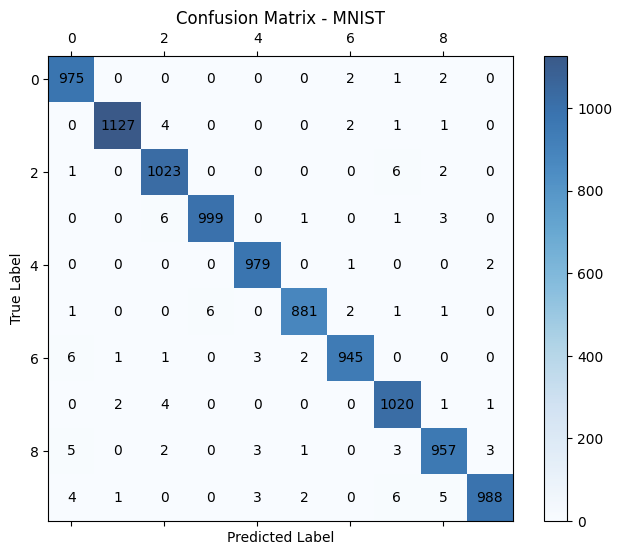

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Predictions from your model
predictions = model.predict(x_test_processed)
y_pred_classes = np.argmax(predictions, axis=1)

# Handle y_test shape automatically
if len(y_test.shape) > 1 and y_test.shape[1] > 1:  
    y_true = np.argmax(y_test, axis=1)
else:  
    y_true = y_test

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Per-class accuracy
class_accuracy = cm.diagonal() / cm.sum(axis=1)

# --- Bar chart with accuracy labels ---
plt.figure(figsize=(8,5))
bars = plt.bar(range(10), class_accuracy, color="blue", alpha=0.8)
plt.xticks(range(10))
plt.ylim(0, 1.05)
plt.title("Accuracy for Each Digit")
plt.xlabel("Digit")
plt.ylabel("Accuracy")
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Add text labels on top of bars
for i, bar in enumerate(bars):
    acc_percent = class_accuracy[i] * 100
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
             f"{acc_percent:.2f}%", ha='center', va='bottom', fontsize=9, color="black")

plt.show()

# --- Confusion matrix (matshow) ---
plt.figure(figsize=(8,6))
plt.matshow(cm, cmap="Blues", alpha=0.8, fignum=1)
plt.title("Confusion Matrix - MNIST")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

# Annotate cells
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, str(cm[i, j]), ha='center', va='center', color="black")

plt.colorbar()
plt.show()


c:\Users\Mahir Kardame\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - accuracy: 0.8428 - loss: 0.4966 - val_accuracy: 0.9698 - val_loss: 0.1001
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.9531 - loss: 0.1578 - val_accuracy: 0.9771 - val_loss: 0.0731
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - accuracy: 0.9661 - loss: 0.1147 - val_accuracy: 0.9826 - val_loss: 0.0542
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.9714 - loss: 0.0950 - val_accuracy: 0.9841 - val_loss: 0.0492
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - accuracy: 0.9748 - loss: 0.0846 - val_accuracy: 0.9853 - val_loss: 0.0455
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 16ms/step - accuracy: 0.9782 - loss: 0.0735 - val_accuracy: 0.9870 - val_loss: 0.0384
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 16ms/step - accuracy: 0.9798 - loss: 0.0660 - val_accuracy: 0.9882 - val_loss: 0.0349
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 16ms/step - accuracy: 0.9813 - loss: 0.0602 - val_accu

c:\Users\Mahir Kardame\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - accuracy: 0.9072 - loss: 0.3054 - val_accuracy: 0.9797 - val_loss: 0.0625
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - accuracy: 0.9708 - loss: 0.1009 - val_accuracy: 0.9848 - val_loss: 0.0474
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - accuracy: 0.9780 - loss: 0.0738 - val_accuracy: 0.9885 - val_loss: 0.0354
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - accuracy: 0.9824 - loss: 0.0582 - val_accuracy: 0.9878 - val_loss: 0.0361
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - accuracy: 0.9848 - loss: 0.0511 - val_accuracy: 0.9896 - val_loss: 0.0314
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - accuracy: 0.9863 - loss: 0.0452 - val_accuracy: 0.9914 - val_loss: 0.0255
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - accuracy: 0.9876 - loss: 0.0393 - val_accuracy: 0.9920 - val_loss: 0.0241
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - accuracy: 0.9895 - loss: 0.0349 - val_accuracy: 0.991

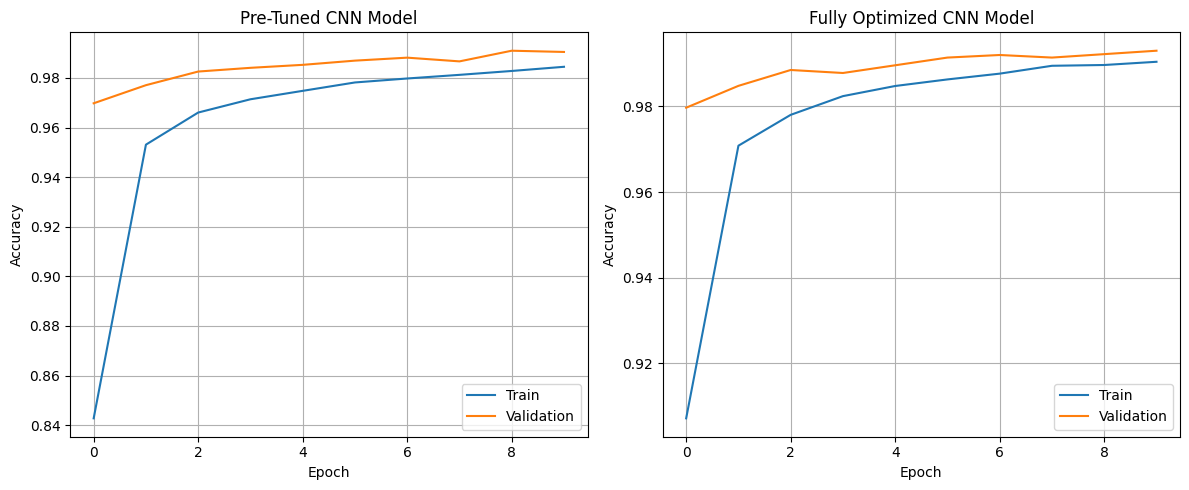


Final Optimized CNN Model Results:
       Model  Accuracy (%)  Precision (%)  Time Taken (s)
0  Pre-Tuned         99.05          99.05           78.31
1  Optimized         99.30          99.30           85.10


In [36]:
import tensorflow as tf
import matplotlib.pyplot as plt
import time
import numpy as np
from sklearn.metrics import precision_score

# --- Load data (MNIST) ---
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train = x_train.reshape(-1, 28, 28, 1).astype("float32") / 255.0
x_test = x_test.reshape(-1, 28, 28, 1).astype("float32") / 255.0

# --- Build CNN ---
def build_model():
    from tensorflow.keras.models import Sequential
    from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
    model = Sequential([
        Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
        MaxPooling2D((2,2)),
        Conv2D(64, (3,3), activation='relu'),
        MaxPooling2D((2,2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(10, activation='softmax')
    ])
    return model

# --- Train and evaluate helper ---
def train_and_evaluate(optimizer, epochs, batch_size, label):
    model = build_model()
    model.compile(optimizer=optimizer,
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])
    
    start_time = time.time()
    history = model.fit(x_train, y_train,
                        epochs=epochs,
                        batch_size=batch_size,
                        validation_data=(x_test, y_test),
                        verbose=1)
    total_time = time.time() - start_time

    # Predictions
    preds = model.predict(x_test, verbose=0)
    y_pred_classes = np.argmax(preds, axis=1)

    # Accuracy & Precision
    test_acc = model.evaluate(x_test, y_test, verbose=0)[1] * 100
    precision = precision_score(y_test, y_pred_classes, average="macro") * 100

    return history, test_acc, precision, total_time

# --- Pre-tuned model (weaker setup) ---
history_pre, acc_pre, prec_pre, time_pre = train_and_evaluate(
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.1), 
    epochs=10, 
    batch_size=128, 
    label="Pre-Tuned"
)

# --- Optimized model (better tuned) ---
history_opt, acc_opt, prec_opt, time_opt = train_and_evaluate(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), 
    epochs=10, 
    batch_size=128, 
    label="Optimized"
)

# --- Plot accuracy curves ---
plt.figure(figsize=(12,5))

# Pre-Tuned
plt.subplot(1,2,1)
plt.plot(history_pre.history['accuracy'], label='Train')
plt.plot(history_pre.history['val_accuracy'], label='Validation')
plt.title("Pre-Tuned CNN Model")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)

# Optimized
plt.subplot(1,2,2)
plt.plot(history_opt.history['accuracy'], label='Train')
plt.plot(history_opt.history['val_accuracy'], label='Validation')
plt.title("Fully Optimized CNN Model")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# --- Summary table ---
import pandas as pd

results = pd.DataFrame({
    "Model": ["Pre-Tuned", "Optimized"],
    "Accuracy (%)": [acc_pre, acc_opt],
    "Precision (%)": [prec_pre, prec_opt],
    "Time Taken (s)": [time_pre, time_opt]
})

print("\nFinal Optimized CNN Model Results:")
print(results.round(2))


Saving BR329_SFP.jpg to BR329_SFP.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Predicted digit: 7


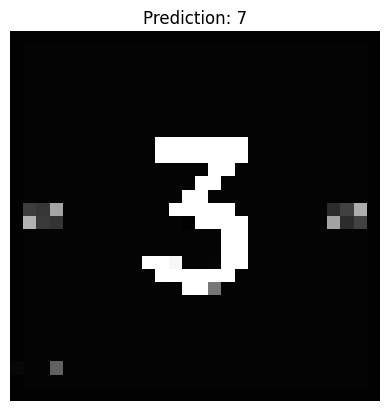

In [ ]:
from google.colab import files

# Upload your digit image
uploaded = files.upload()

for filename in uploaded.keys():
    # Load in grayscale
    img = Image.open(filename).convert('L')
    img = np.array(img)

    # Resize to 28x28 (MNIST size)
    img_resized = cv2.resize(img, (28, 28))

    # Invert if background is white (MNIST expects black background, white digit)
    img_resized = 255 - img_resized

    # Normalize to [0,1]
    img_normalized = img_resized / 255.0

    # Reshape for model: (1, 28, 28)
    img_input = np.expand_dims(img_normalized, axis=0)

    # Predict
    prediction = model.predict(img_input)
    print("Predicted digit:", prediction.argmax())

    # Show image
    plt.imshow(img_resized, cmap='gray')
    plt.title(f"Prediction: {prediction.argmax()}")
    plt.axis('off')
    plt.show()
